# LSTM graphs

In [4]:
import os
import matplotlib.pyplot as plt
import json
import matplotlib.image as mpimg
import numpy as np

rootdir = './testLSTM/'       

In [5]:
def checkJson(json, name=None, initial_lr=None, dropout=None, l2_reg=None, batch_norm=None, data_aug=None):
    if name is not None and json["name_model"]!=name:
        return False
    if initial_lr is not None and json["initial_lr"]!=initial_lr:
        return False
    if dropout is not None and json["dropout"]!=dropout:
        return False
    if l2_reg is not None and json["l2_reg"]!=name:
        return False
    if batch_norm is not None and json["batch_norm"]!=name:
        return False
    if data_aug is not None and json["data_aug"]!=data_aug:
        return False
    return True
    
def confidenceInterval(accuracy, n_test):
    return 1.96*np.sqrt(accuracy*(100-accuracy)/n_test)

def getBestValAcc(data):
    return np.amax(np.array(list(data["train_result_augmentation"]["val_accuracy"].values())))

## Model plots

from keras.utils.vis_utils import plot_model
from models import LSTM_doubleSweep, LSTM_singleSweep

model = LSTM_singleSweep(0, num_classes=10, img_width=32, img_height=32, img_channels=3,l2_reg=0)
plot_model(model, to_file='./LSTM_singleSweep.png', show_shapes=True, show_layer_names=False)

model = LSTM_doubleSweep(0, num_classes=10, img_width=32, img_height=32, img_channels=3,l2_reg=0)
plot_model(model, to_file='./LSTM_doubleSweep.png', show_shapes=True, show_layer_names=False)

1

0 13_12_37_24 LSTM_singleSweep - acc=47.02\pm0.98  -l2=0.0000  -dropout=0.00
1 13_14_49_55 LSTM_singleSweep - acc=52.34\pm0.98  -l2=0.0000  -dropout=0.00
2 13_16_39_32 LSTM_doubleSweep - acc=42.86\pm0.97  -l2=0.0000  -dropout=0.00
3 13_19_10_35 LSTM_doubleSweep - acc=50.36\pm0.98  -l2=0.0000  -dropout=0.00
4 13_21_32_55 LSTM_doubleSweep - acc=57.45\pm0.97  -l2=0.0000  -dropout=0.00
5 13_23_54_32 LSTM_doubleSweep - acc=60.09\pm0.96  -l2=0.0000  -dropout=0.00
6 14_09_03_51 LSTM_singleSweep - acc=56.16\pm0.97  -l2=0.0000  -dropout=0.00
7 14_11_15_36 LSTM_singleSweep - acc=57.81\pm0.97  -l2=0.0000  -dropout=0.00
8 14_13_09_23 LSTM_singleSweep_dropout - acc=58.45\pm0.97  -l2=0.0000  -dropout=0.10
9 14_15_15_02 LSTM_singleSweep_dropout - acc=56.15\pm0.97  -l2=0.0000  -dropout=0.25
10 14_22_25_19 LSTM_doubleSweep_dropout - acc=60.10\pm0.96  -l2=0.0000  -dropout=0.10
11 15_12_50_55 LSTM_doubleSweep_dropout - acc=59.32\pm0.96  -l2=0.0000  -dropout=0.25


KeyError: 'train_result'

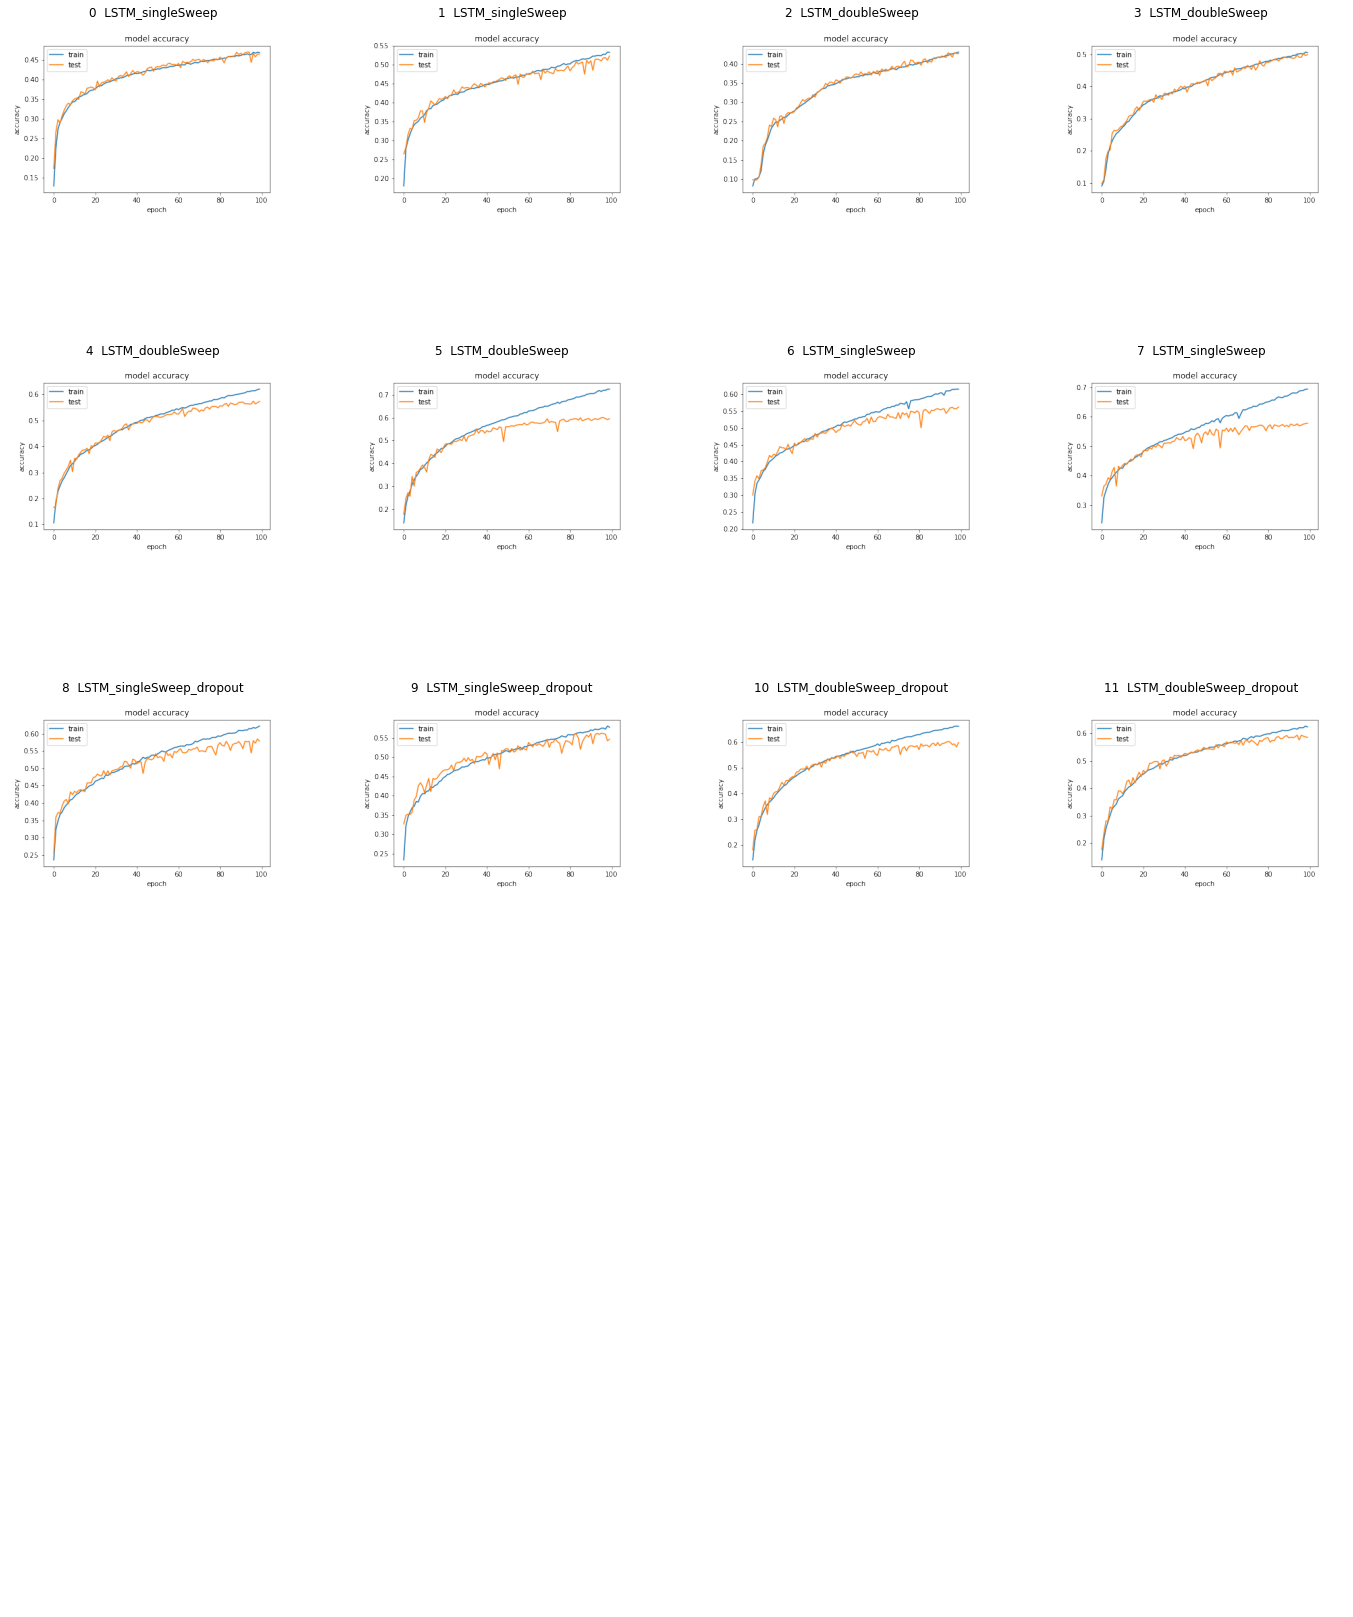

In [18]:
fig, axs = plt.subplots(5, 4,figsize=(24,30))


for ax in axs:
    for a in ax:
        a.set_axis_off()

i= 0

for subdir, dirs, files in os.walk(rootdir):
    for dir in sorted(dirs):
        if (dir!=".ipynb_checkpoints"):
            f = open(rootdir+dir+"/experiment.json")
            data = json.load(f)
            s = data["parameters"]["name_model"]+" - acc=" +'{:.2f}'.format(getBestValAcc(data)*100)+"\pm"+'{:.2f}'.format(confidenceInterval(getBestValAcc(data)*100,10_000))
            s = s +"  -l2="+'{:.4f}'.format(data["parameters"]["l2_reg"])
            s = s +"  -dropout="+'{:.2f}'.format(data["parameters"]["dropout"])
            print(i,dir, s)
            
            img = mpimg.imread(rootdir+dir+"/accuracy.png")
            axs[i//4,i%4].set_title(str(i)+"  "+ data["parameters"]["name_model"])
            
            axs[i//4,i%4].imshow(img)
            i+=1
            

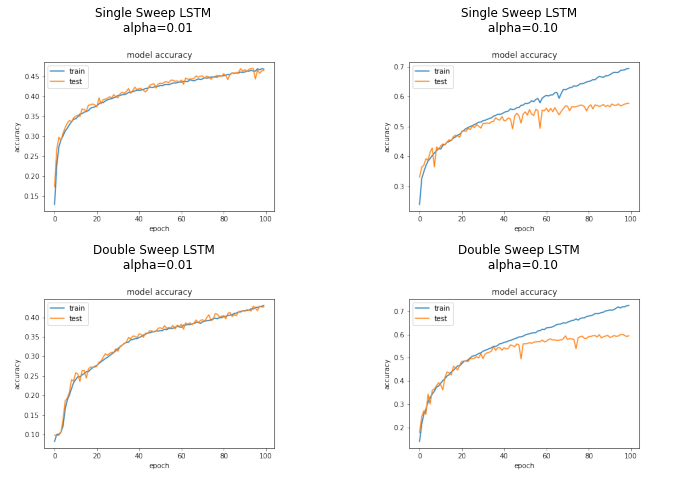

In [41]:
fig, axs = plt.subplots(2, 2,figsize=(12,8))

for ax in axs:
    for a in ax:
        a.set_axis_off()

i=0
j=0
for subdir, dirs, files in os.walk(rootdir):
    for dir in sorted(dirs):
        if (dir!=".ipynb_checkpoints"):
            #print(rootdir+dir+"/experiment.json")
            f = open(rootdir+dir+"/experiment.json")
            data = json.load(f)
            if checkJson(data["parameters"], name="LSTM_singleSweep"):
                if checkJson(data["parameters"], initial_lr=0.01) or checkJson(data["parameters"], initial_lr=0.1):
                    img = mpimg.imread(rootdir+dir+"/accuracy.png")
                    axs[0,i].set_title("Single Sweep LSTM \n alpha="+'{:.2f}'.format(data["parameters"]["initial_lr"]))
                    axs[0,i].imshow(img)
                    i+=1
            if checkJson(data["parameters"], name="LSTM_doubleSweep"):
                if checkJson(data["parameters"], initial_lr=0.01) or checkJson(data["parameters"], initial_lr=0.1):
                    img = mpimg.imread(rootdir+dir+"/accuracy.png")
                    axs[1,j].set_title("Double Sweep LSTM \n alpha="+ '{:.2f}'.format(data["parameters"]["initial_lr"]))
                    axs[1,j].imshow(img)
                    j+=1
                

In [ ]:


fig, axs = plt.subplots(2, 4,figsize=(23,6))

for ax in axs:
    for a in ax:
        a.set_axis_off()

i=0
j=0
for subdir, dirs, files in os.walk(rootdir):
    for dir in sorted(dirs):
        if (dir!=".ipynb_checkpoints"):
            #print(rootdir+dir+"/experiment.json")
            f = open(rootdir+dir+"/experiment.json")
            data = json.load(f)
            if checkJson(data["parameters"], name="LSTM_singleSweep_dropout"):
                img = mpimg.imread(rootdir+dir+"/accuracy.png")
                axs[0,i].set_title(str(data["parameters"]["dropout"])+ "  " +str('{:.2f}'.format(getBestValAcc(data)*100)))
                axs[0,i].imshow(img)
                i+=1
            if checkJson(data["parameters"], name="LSTM_singleSweep"):
                img = mpimg.imread(rootdir+dir+"/accuracy.png")
                axs[1,j].set_title(str(data["parameters"]["dropout"])+ "  " +str('{:.2f}'.format(getBestValAcc(data)*100)))
                axs[1,j].imshow(img)
                j+=1

In [ ]:
header = "Learning Rate & "
row2 = "Single Sweep LSTM & "
row4 = "Double Sweep LSTM & "

for subdir, dirs, files in os.walk(rootdir):
    for dir in sorted(dirs):
        if (dir!=".ipynb_checkpoints"):
            #print(rootdir+dir+"/experiment.json")
            f = open(rootdir+dir+"/experiment.json")
            data = json.load(f)
            if checkJson(data["parameters"], name="LSTM_singleSweep"):
                header += "$"+str('{:.3f}'.format(data["parameters"]["initial_lr"])) + "$ & "
                row2+= "$"+str('{:.2f}'.format(getBestValAcc(data)*100))+"\pm"+str('{:.2f}'.format(confidenceInterval(getBestValAcc(data)*100, 10_000))) + "$ &"
            if checkJson(data["parameters"], name="LSTM_doubleSweep"):
                #header += "$"+str('{:.3f}'.format(data["parameters"]["initial_lr"])) + "$ & "
                row4+= "$"+'{:.2f}'.format(getBestValAcc(data)*100)+"\pm"+'{:.2f}'.format(confidenceInterval(getBestValAcc(data)*100, 10_000)) + "$ &"

print(header[0:-1])
print(row2[0:-1])
print(row4[0:-1])


LSTM_doubleSweep_BN - acc=61.94\pm0.95
LSTM_singleSweep_BN - acc=56.71\pm0.97


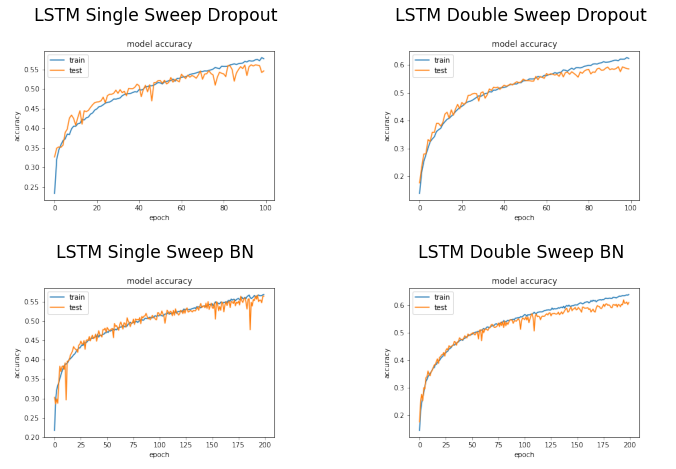

In [51]:
fig, axs = plt.subplots(2, 2,figsize=(12,8))


for ax in axs:
    for a in ax:
        a.set_axis_off()

for subdir, dirs, files in os.walk(rootdir):
    for dir in sorted(dirs):
        if (dir!=".ipynb_checkpoints"):
            f = open(rootdir+dir+"/experiment.json")
            data = json.load(f)
            #print(dir,data["parameters"]["name_model"], data["parameters"]["l2_reg"])
            if checkJson(data["parameters"], name="LSTM_doubleSweep_BN"):
                img = mpimg.imread(rootdir+dir+"/accuracy_augmentation.png")
                axs[1,1].set_title("LSTM Double Sweep BN", fontsize="xx-large")
                axs[1,1].imshow(img)
                s = data["parameters"]["name_model"]+" - acc=" +'{:.2f}'.format(getBestValAcc(data)*100)+"\pm"+'{:.2f}'.format(confidenceInterval(getBestValAcc(data)*100,10_000))
                print(s)
                
            if checkJson(data["parameters"], name="LSTM_singleSweep_BN"):
                img = mpimg.imread(rootdir+dir+"/accuracy_augmentation.png")
                axs[1,0].set_title("LSTM Single Sweep BN", fontsize="xx-large")
                axs[1,0].imshow(img)
                s = data["parameters"]["name_model"]+" - acc=" +'{:.2f}'.format(getBestValAcc(data)*100)+"\pm"+'{:.2f}'.format(confidenceInterval(getBestValAcc(data)*100,10_000))
                print(s)
                
            if checkJson(data["parameters"], name="LSTM_singleSweep_dropout", dropout=0.25):
                img = mpimg.imread(rootdir+dir+"/accuracy.png")
                axs[0,0].set_title("LSTM Single Sweep Dropout", fontsize="xx-large")
                axs[0,0].imshow(img)

            if checkJson(data["parameters"], name="LSTM_doubleSweep_dropout", dropout=0.25):
                img = mpimg.imread(rootdir+dir+"/accuracy.png")
                axs[0,1].set_title("LSTM Double Sweep Dropout", fontsize="xx-large")
                axs[0,1].imshow(img)
